# Dataset Cleaning

In [188]:
import pandas as pd  # Data manipulation library
import time  # Library to measure execution times
from sklearn.model_selection import train_test_split  # Train/test set splitting
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naïve Bayes classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Metrics for evaluation
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [189]:
# This will prompt for authorization.
from google.colab import drive
drive.mount('/content/drive/')
#     #      #      #       #      #
# Load the dataset with the appropriate encoding
data = pd.read_csv('/content/drive/MyDrive/Assigment/spam_ham.csv', encoding='latin-1')
data.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [190]:
# Select columns 'v1' (labels) and 'v2' (text data)
# Did not choose the columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' for the analysis
# as these columns have a significant number of missing values (NaN) and do not provide relevant information
# for spam/ham classification task.
data = data[['v1', 'v2']]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [191]:
num_samples, num_features = data.shape  # Get number of samples and features
print('The number of samples:', num_samples)
print('The number of features (including target):', num_features)

The number of samples: 5572
The number of features (including target): 2


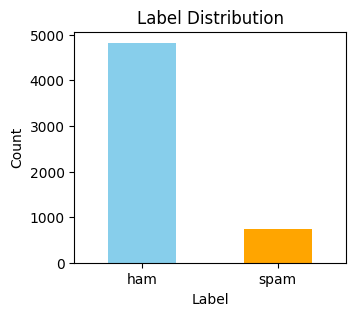

In [192]:
# Visualize label distribution
plt.figure(figsize=(3.5, 3))
data['v1'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.xticks(ticks=[0, 1], labels=['ham', 'spam'], rotation=0)
plt.show()

In [193]:
# Checking for null values
null_values = data.isnull().sum()
print('Null values:\n', null_values)

Null values:
 v1    0
v2    0
dtype: int64


In [194]:
# Checking for zero values
zero_values = data.eq(0).sum().sum()
if zero_values > 0:
    print("There are zero values in the dataset.")
else:
    print("There are no zero values in the dataset.")

There are no zero values in the dataset.


In [195]:
# Remove duplicated rows
data = data.drop_duplicates()

num_samples_after_drop_duplicates = len(data)
print('The number of samples after removing duplicates:', num_samples_after_drop_duplicates)

The number of samples after removing duplicates: 5169


In [196]:
# Replace categorical labels with numbers
data['v1'].replace({'ham': 0, 'spam': 1}, inplace=True)

<ipython-input-196-1bec27e8f071>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['v1'].replace({'ham': 0, 'spam': 1}, inplace=True)


# Model

In [197]:
# Split the dataset
X = data['v2']
y = data['v1']

In [198]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
# Initialize the Naïve Bayes classifier (Multinomial Naïve Bayes for text data)
naive_bayes_classifier = MultinomialNB()

In [200]:
# Measure the start time for both Classification and Computation
start_time_Classification = time.time()
start_time_Computation = time.time()

In [201]:
# Convert text data to lowercase
X_lower = X.apply(lambda x: x.lower())

# Create a CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X_lower)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train Naïve Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [202]:
# Measure the end time for Classification
end_time_Classification = time.time()

In [203]:
# Define the calculate_error_rate function

def calculate_error_rate(true_labels, predicted_labels):

    n = len(true_labels)  #Total number of samples (observations)

    error_count = sum(true_labels != predicted_labels)  # Count the number of misclassifications

    error_rate = error_count / n  # Calculate the error rate by dividing misclassifications by total samples

    return error_rate  # Return the error rate

In [204]:
# Predict using the trained classifier
test_pred = naive_bayes_classifier.predict(X_test)

In [205]:
# Measure the end time for Computation
end_time_Computation = time.time()

# Evaluation

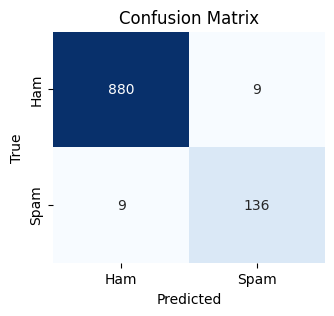

In [206]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, test_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3.5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [207]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, test_pred)
classification_rep = classification_report(y_test, test_pred)
error_rate = calculate_error_rate(y_test, test_pred)

In [208]:
# Display the results
print('Accuracy: ',round(accuracy,3))
print('\nError rate: ',round(error_rate,3))
print('\nClassification Report:\n', classification_rep)

Accuracy:  0.983

Error rate:  0.017

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.94      0.94      0.94       145

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [209]:
# Display computation and classification time
classification_time = end_time_Classification - start_time_Classification
computation_time = end_time_Computation - start_time_Computation
print("Classification Time:",round(classification_time,4) ,"seconds")
print("Computational Time:",round(computation_time,4) ,"seconds")

Classification Time: 0.31 seconds
Computational Time: 0.3421 seconds
